# Figure 4

In this notebook we will generate Figure 4, which contains a dendrogram and heatmap from fineStructure. Steps:
1. Read the coancestry and tree files
2. Keep only common ids
3. Order coancestry matrix according to tree file
4. Plot them together

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
import seaborn as sns
import os
import io
import xml.etree.ElementTree as ET
from ete3 import Tree

## Reading files

We'll read the coancestry and tree files

In [2]:
#Folders
projpath = os.path.realpath("../..")
pathfs   = os.path.join(projpath, "DataBases", "Genotypes", "FineStructure")
pathres  = os.path.join(projpath, "Results")

In [3]:
os.chdir(pathfs)
coances = pd.read_table("total_fs_linked.chunkcounts.out", skiprows = 1, sep = " ", index_col = 0)
os.chdir(pathres)
com_ids = pd.read_csv("common_ids.txt", header=None)
tot_samp = pd.read_csv("tot_samples.csv")
counts = tot_samp['cluster_initial'].value_counts()

/home/tomas/anaconda3/envs/py/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  
/home/tomas/anaconda3/envs/py/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
#Reading tree
#Parsing xml
os.chdir(pathfs)
tree = ET.parse('total_fs_linked.greedy_outputfile.xml') 
root = tree.getroot() 
for child in root:
    print(child.tag, child.attrib)

for i in root.iter('Tree'):
    poptree = i.text
    
dendtree = Tree(poptree) #from ete3

header {}
comment {}
Iteration {}
Tree {}


## Pruning

We'll keep only the IDs from common IDs file

In [8]:
#Coancestry matrix
#Use columns and not the rows!
coances_cols = coances.columns
keep    = coances_cols.isin(com_ids.iloc[:,0])
coances = coances.iloc[keep, keep]
#Update cols
coances_cols = coances.columns

In [9]:
#Tree
dendtree.prune(list(com_ids.iloc[:,0]), preserve_branch_length=True)

ValueError: Node names not found: ['CSF001', 'CSF002', 'CSF005', 'CSF012', 'CSF014', 'CSF022', 'CSF027', 'CSF039', 'CSF040', 'CSF041', 'CSF045', 'CSF047', 'CSF051', 'CSF055', 'CSF061', 'CSF062', 'CSF070', 'CSM002', 'CSM007', 'CSM009', 'CSM014', 'CSM019', 'CSM023', 'CSM034', 'CSM035', 'CSM037', 'CSM039', 'CSM040', 'CSM042', 'CSM047', 'CVSN006', 'CVSN036', 'CVSN053', 'CVSN054', 'CVST282', 'CVST299', 'CVST308', 'CVST310', 'CVST313', 'CVST341', 'CVST364', 'CVST366', 'CVST385', 'CVST550', 'CVSV106', 'CVSV142', 'CVSV161', '50240', '50243', '50246', '50248', '50249', '50253', '50254', '50258', '50259', '50276', '50285', '50298', '50300', '50301', '50302', '50313', '50314', '50326', '50330', '50331', '50340', '50341', '50342', '50343', '50346', '50348', '50358', '50367', '50390', '50395', '50396', '50399', '50600', '50601', '50603', '50605', '50607', '50613', '50616', '50617', '50618', '50620', '50621', '50624', '50628', '50630', '50631', '50632', '50633', '50637', '50645', '50647', '50648', '50657', '50658', '50669', '50671', '50673', '50678', '50681', '50683', '50685', '50686', '50693', '50695', '50698', '50700', '50703', '50711', '50712', '50713', '50714', '50720', '50721', '50728', '50730', '50731', '50738', '50741', '50742', '50743', '50745', '50746', '50749', '50754', '50756', '50763', '50764', '50766', '50767', '50771', '50772', '50773', '50777', '50790', '50794', '50795', '50799', '50800', '50803', '50804', '50806', '50807', '50808', '50814', '50817', '50819', '50821', '50823', '50826', '50828', '50830', '50832', '50834', '50839', '50840', '50841', '50842', '50844', '50848', '50852', '50855', '50856', '50857', '50862', '50863', '50871', '50873', '50877', '50880', '50881', '50882', '50883', '50888', '50894', '50895', '50898', '50902', '50903', '50914', '50916', '50918', '50919', '50921', '50923', '50924', '50925', '50926', '50927', '50929', '50936', '50938', '50942', '50944', '50945', '50952', '50953', '50960', '50961', '50962', '50964', '50978', '50979', '60000', '60006', '60007', '60010', '60011', '60013', '60014', '60015', '60023', '60026', '60030', '60031', '60032', '60034', '60058', '60063', '60077', '60079', '60080', '60082', '60087', '60088', '60094', '60108', '60112', '60113', '60114', '60116', '60117', '60119', '60120', '60128', '60130', '60131', '60139', '60141', '60144', '60145', '60149', '60152', '60153', '60155', '60163', '60167', '60170', '60174', '60180', '60185', '60195', '60196', '60200', '60201', '60204', '60208', '60221', '60227', '60229', '60232', '60233', '60234', '60244', '60245', '60246', '60247', '60248', '60252', '60254', '60259', '60263', '60284', '60287', '60290', '60294', '60296', '60304', '60306', '60308', '60313', '60314', '60315', '60321', '60323', '60325', '60328', '60329', '60331', '60333', '60337', '60341', '60343', '60344', '60354', '60363', '60365', '60367', '60369', '60375', '60376', '60379', '60380', '60381', '60417', '60423', '60429', '60430', '60431', '60432', '60435', '60436', '60438', '60439', '60440', '60442', '60456', '60462', '60465', '60466', '60474', '60475', '60482', '60494', '60497', '60503', '60515', '60519', '60521', '60522', '60523', '60531', '60533', '60534', '60539', '60540', '60543', '60559', '60561', '60567', '60570', '60575', '60576', '60586', '60591', '60598', '60604', '60606', '60607', '60610', '60626', '60628', '60634', '60637', '60638', '60640', '60644', '60648', '60650', '60660', '60665', '60671', '60676', '60678', '60680', '60686', '60689', '60690', '60693', '60698', '60713', '60718', '60720', '60722', '60723', '60727', '60728', '60729', '60730', '60743', '60746', '60748', '60757', '60758', '60801', '60802', '60808', '60811', '60812', '60814', '60823', '60825', '60826', '60830', '60831', '60835', '60836', '60837', '60838', '60839', '61008', '61500', '61529', '61549', '61561', '61621', '61641', '62091', '62504', '62515', '62517', '62533', '62544', '62551', '62567', '62568', '62575', '62597', '62666', '62672', '62676', '62683', '62696', '62699', '63131', '64105', '64108', '64112', '64113', '64121', '64122', '64123', '64124', '64127', '64131', '64134', '64135', '64137', '64138', '64139', '64141', '64142', '64143', '64144', '64145', '64146', '64147', '64149', '64150', '64152', '64153', '64155', '64156', '64157', '64164', '64172', '64173', '64177', '64178', '64183', '64184', '64187', '64188', '64191', '64193', '64194', '64195', '64196', '64197', '64202', '64203', '64206', '64207', '64208', '64211', '64212', '64213', '64214', '64217', '64220', '64221', '64222', '64224', '64226', '64227', '64228', '64230', '64231', '64234', '64239', '64242', '64244', '64248', '64252', '64257', '64258', '64259', '64261', '64262', '64263', '64265', '64272', '64273', '64274', '64278', '64287', '64288', '64289', '64291', '64292', '64293', '64294', '64297', '64298', '64300', '64304', '64305', '64307', '64311', '64312', '64313', '64316', '64317', '64318', '64319', '64322', '64323', '64327', '64328', '64333', '64334', '64335', '64337', '64339', '64341', '64343', '64344', '64349', '64352', '64355', '64356', '64357', '64360', '64363', '64364', '64365', '64366', '64369', '64372', '64374', '64376', '64377', '64378', '64379', '64382', '64383', '64386', '64387', '64393', '64396', '64397', '64399', '64400', '64402', '64403', '64404', '64406', '64413', '64418', '64419', '64422', '64423', '64424', '64425', '64427', '64429', '64430', '64431', '64432', '64433', '64443', '64444', '64448', '64449', '64450', '64451', '64453', '64454', '64455', '64456', '64457', '64458', '64459', '64462', '64463', '64464', '64466', '64467', '64472', '64474', '64475', '64477', '64479', '64481', '64484', '64485', '64486', '64488', '64490', '64494', '64497', '64499', '64500', '64501', '64502', '64504', '64505', '64507', '64511', '64513', '64514', '64515', '64516', '64518', '64521', '64523', '64524', '64526', '64528', '64530', '64533', '64535', '64537', '64542', '64544', '64545', '64547', '64549', '64552', '64557', '64560', '64564', '64567', '64569', '64573', '64574', '64575', '64578', '64579', '64581', '64585', '64586', '64587', '64590', '64594', '64596', '64600', '64601', '64603', '64605', '64606', '64610', '64611', '64612', '64615', '64622', '64624', '64625', '64626', '64636', '64641', '64643', '64646', '64667', '64671', '64677', '64688', '64701', '64726', '64733', '64749', '64814', '64821', '64831', '64833', '64835', '64841', '64843', '64849', '64852', '64854', '64861', '64872', '64875', '64878', '64883', '64884', '64895', '131229', '131232', '140011', '140012', '140015', '140016', '140018', '140025', '140035', '140101', '140104', '140106', '140107', '140108', '140114', '140123', '140152', '140215', '140224', '140235', '140241', '140259', '140261', '140371', '140379', '140415', '140500', '140522', '140531', '140595', '140615', '140628', '140637', '140639', '140641', '140653', '140676', '140696', '140700', '140719', '140723', '140725', '140731', '140738', '140781', '140825', '140832', '140850', '140921', '140922', '140977', '141129', '141157', '141195', '141251', '141307', '141319', '141353', '141381', '141382', '141408', '141414', '141418', '141419', '141424', '141447', '141460', '141536', '141550', '141567', '141570', '141575', '141586', '141597', '141625', '141635', '141694', '141700', '141712', '141727', '141737', '141740', '141753', '141756', '141769', '141772', '141774', '141792', '141796', '141814', '141816', '141826', '141827', '141829', '141835', '141866', '141883', '141906', '141955', '141977', '141978', '141979', '142002', '143047', '143165', '143232', '143298', '143375', '143376', '143385', '143470', '143523', '143537']

## Order

We'll order the coancestry matrix based on the tree

In [10]:
leaf_names = dendtree.get_leaf_names()

In [11]:
sort_index = []
for x in (leaf_names):
    l = list(coances_cols).index(x)
    sort_index.append(l)

In [12]:
coances = coances.iloc[sort_index, sort_index]

## Plot

Now, we'll plot the coancestry matrix and the tree

In [33]:
#Scaling values
test    = np.matrix(coances)
#Cap max value
max_val = 10
test[test > max_val] = max_val

#OR
#test2   = np.matrix(coances)
#test2[test2 > 0] = np.log(test2[test2 > 0])

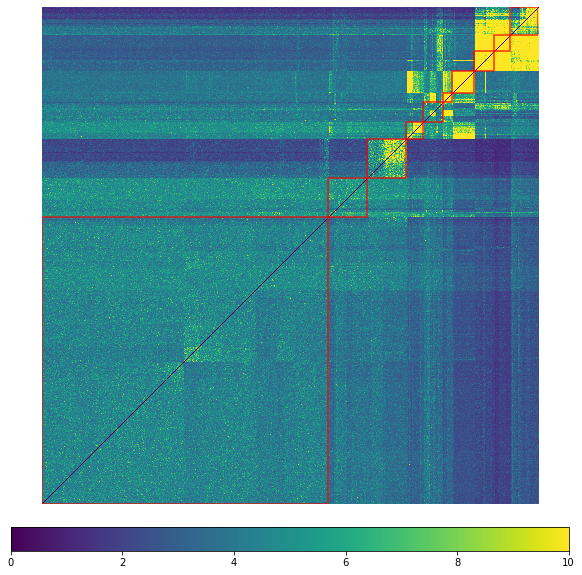

In [34]:
fig = plt.figure(figsize=(10,10))
plt.clf()
gs  = gridspec.GridSpec(12, 1, hspace=1)

ax1  = fig.add_subplot(gs[0:11,0])
ax2 = fig.add_subplot(gs[11,0])
toplot = test
res = ax1.imshow(toplot, cmap=plt.cm.viridis, vmin = 0)    
#plt.axis('off')

cb  = fig.colorbar(res, cax = ax2, orientation="horizontal")

start = 0
for i,l in enumerate(counts.sort_index()):
    end = l
    ax1.add_patch(patches.Rectangle((start, start), end, end, alpha=0.8, fill=False, facecolor="red", edgecolor="red", linewidth=1.5, linestyle='solid'))
    start = start + end

ax1.set_xlim([0,2729])
ax1.set_ylim([0,2729])
ax1.axis('off')

plt.plot()
plt.show()